In [285]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy.linalg as lin
import pandas as pd
from sklearn.metrics import confusion_matrix




In [286]:
mean = [[0.0,4.5],[-4.5,-1.0],[4.5,-1.0],[0.0,-4.0]]
cov  = [[[3.2,0.0],[0.0,1.2]],[[1.2,0.8],[0.8,1.2]],[[1.2,-0.8],[-0.8,1.2]],[[1.2,0.0],[0.0,3.2]]]
class_sizes = [105,145,135,115]

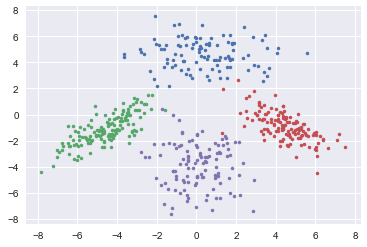

In [287]:

X1 = np.random.multivariate_normal(mean[0],cov[0],class_sizes[0]).T
X2 = np.random.multivariate_normal(mean[1],cov[1],class_sizes[1]).T
X3= np.random.multivariate_normal(mean[2],cov[2],class_sizes[2]).T
X4= np.random.multivariate_normal(mean[3],cov[3],class_sizes[3]).T
Y1 = np.repeat(1,class_sizes[0]).astype(int)
Y2 = np.repeat(2,class_sizes[1]).astype(int)
Y3 = np.repeat(3,class_sizes[2]).astype(int)
Y4 = np.repeat(4,class_sizes[3]).astype(int)
a = np.array(list(zip(X1[0],X1[1],Y1)))
b= np.array(list(zip(X2[0],X2[1],Y2)))
c= np.array(list(zip(X3[0],X3[1],Y3)))
d= np.array(list(zip(X4[0],X4[1],Y4)))

data = np.concatenate((a,b,c,d))


plt.plot(X1[0],X1[1], '.')

plt.plot(X2[0], X2[1], '.')

plt.plot(X3[0],X3[1], '.')

plt.plot(X4[0], X4[1], '.')

plt.show()

In [288]:
np.savetxt("hw01_data_set.csv", data, fmt = "%f,%f,%d") 

In [289]:
data_set = np.genfromtxt("hw01_data_set.csv", delimiter = ",")

In [290]:
x = data_set[:,:2]
y = data_set[:,2].astype(int)
K = np.max(y)
N = data_set.shape[0]

In [291]:
sample_means = np.array([np.mean(x[y == (c + 1)],axis = 0,keepdims = True) for c in range(K)])
print(sample_means)

[[[ 0.38769524  4.62207818]]

 [[-4.56531806 -1.12265826]]

 [[ 4.42863107 -0.892582  ]]

 [[ 0.0650379  -3.92161042]]]


In [292]:
sample_covariances = np.array([np.dot((x[y == (c + 1)] - sample_means[c]).T,(x[y == (c + 1)] - sample_means[c]))/class_sizes[c] for c in range(K)])
print(sample_covariances)

[[[ 3.34768671 -0.10446251]
  [-0.10446251  1.2489653 ]]

 [[ 1.4964771   1.07337708]
  [ 1.07337708  1.33266465]]

 [[ 1.28398474 -0.81921942]
  [-0.81921942  1.21355746]]

 [[ 1.42888135 -0.15754449]
  [-0.15754449  2.82210942]]]


In [293]:
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
print(class_priors)

[0.21, 0.29, 0.27, 0.23]


In [294]:

# score function for single x
def score_for_x(x,class_means,class_covariances,class_priors):
    scores = [] 
    for c in range(len(class_priors)):
        W = -0.5*lin.pinv(sample_covariances[c])
        w = np.dot(lin.pinv(sample_covariances[c]),class_means[c].T)
        wi = -0.5*np.dot(class_means[c],w) -0.5*np.log(lin.det(sample_covariances[c])) + np.log(class_priors[c])
        score = np.dot(np.dot(x.T,W),x) + np.dot(w.T,x) + wi
        scores.append(np.squeeze(score))
                                                         
                                                         
    return np.array(scores)                              
#score function for matrix X                        
def score_for_X(X,class_means,class_covariances,class_priors):
    scores = []
    for x in X:
        scores.append(np.squeeze(score_for_x(x,class_means,class_covariances,class_priors)))
        
    
    return np.array(scores)    







In [295]:
scores = score_for_X(x,sample_means,sample_covariances,class_priors)
predicted = np.array([np.argmax(i) + 1 for i in scores])
results = confusion_matrix(predicted,y)

In [296]:
confusion_matrix = pd.crosstab(predicted,y,rownames = ["y_pred"],colnames = ["y_truth"])
print(confusion_matrix)

y_truth    1    2    3    4
y_pred                     
1        104    0    2    0
2          1  145    0    1
3          0    0  132    0
4          0    0    1  114


In [297]:

sepw, sepl = np.meshgrid(np.arange(-10,10,0.05),np.arange(-10,10,0.05))
cdf = pd.DataFrame({'sepal width': sepw.reshape(-1),
                    'sepal length': sepl.reshape(-1),
                    'const':1})

contourx = list(zip(cdf["sepal width"].to_numpy(),cdf["sepal length"].to_numpy()))

contourx = [np.array([x,y]) for x,y in contourx ]
cdf["prediction"] = np.array([np.argmax(i) + 1 for i in score_for_X(contourx,sample_means,sample_covariances,class_priors)])

  


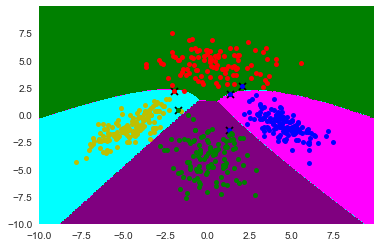

In [302]:
ax = plt.contourf(sepw,sepl,cdf["prediction"].values.reshape(sepw.shape),colors = ["green","magenta","cyan","purple"])


plt.plot(x[(y == 1),0],x[(y == 1),1],'r.',markersize = 10)
plt.plot(x[(y == 2),0],x[(y == 2),1],'y.',markersize = 10)
plt.plot(x[(y == 3),0],x[(y == 3),1],'b.',markersize = 10)
plt.plot(x[(y == 4),0],x[(y == 4),1],'g.',markersize = 10)

plt.scatter(x[y != predicted,0],x[y != predicted,1],marker = "x",color = "black")

plt.show()
# marked misclassifed points as x in scatter plot, the way instructor did in the lab seem to not work in this case. 
